In [12]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import tree


In [13]:
# Import Data into dataframe
df = pd.read_csv("~/Xtern2023/XTern 2024 Artificial Intelegence Data Set - Xtern_TrainData.csv")
df.head()

,Year,Major,University,Time,Order
0,Year 2,Physics,Indiana State University,12,Fried Catfish Basket
1,Year 3,Chemistry,Ball State University,14,Sugar Cream Pie
2,Year 3,Chemistry,Butler University,12,Indiana Pork Chili
3,Year 2,Biology,Indiana State University,11,Fried Catfish Basket
4,Year 3,Business Administration,Butler University,12,Indiana Corn on the Cob (brushed with garlic b...


In [14]:
# Changing labels from objects to floats using One Hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore')

# Encoding University, Year and Major
encoded_uni_df = pd.DataFrame(encoder.fit_transform(df[['University']]).toarray())
encoded_year_df = pd.DataFrame(encoder.fit_transform(df[['Year']]).toarray())
encoded_major_df = pd.DataFrame(encoder.fit_transform(df[['Major']]).toarray())

# Drop original Year and Major columns
one_hot_df = df.drop(['Year', 'Major', 'University'], axis=1)

# Adding new columns back into df
one_hot_df = pd.concat([one_hot_df, encoded_uni_df, encoded_year_df, encoded_major_df], axis=1)

# Creating instance of label converter
lab = LabelEncoder()
one_hot_df['Order'] = lab.fit_transform(one_hot_df['Order'])

# Making Sure All Column Names are Strings
one_hot_df.columns = one_hot_df.columns.astype(str)

In [15]:
# Breaking up our dataframe into x and y
x = one_hot_df
y = one_hot_df['Order']

In [16]:
# Splitting the Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 50)

In [17]:
# Creating Decision Tree Model
decisionTree = DecisionTreeClassifier()

# Fitting the data
decisionTree.fit(X_train, y_train)

# Making Predicitons
y_pred = decisionTree.predict(X_test)

# Determining Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


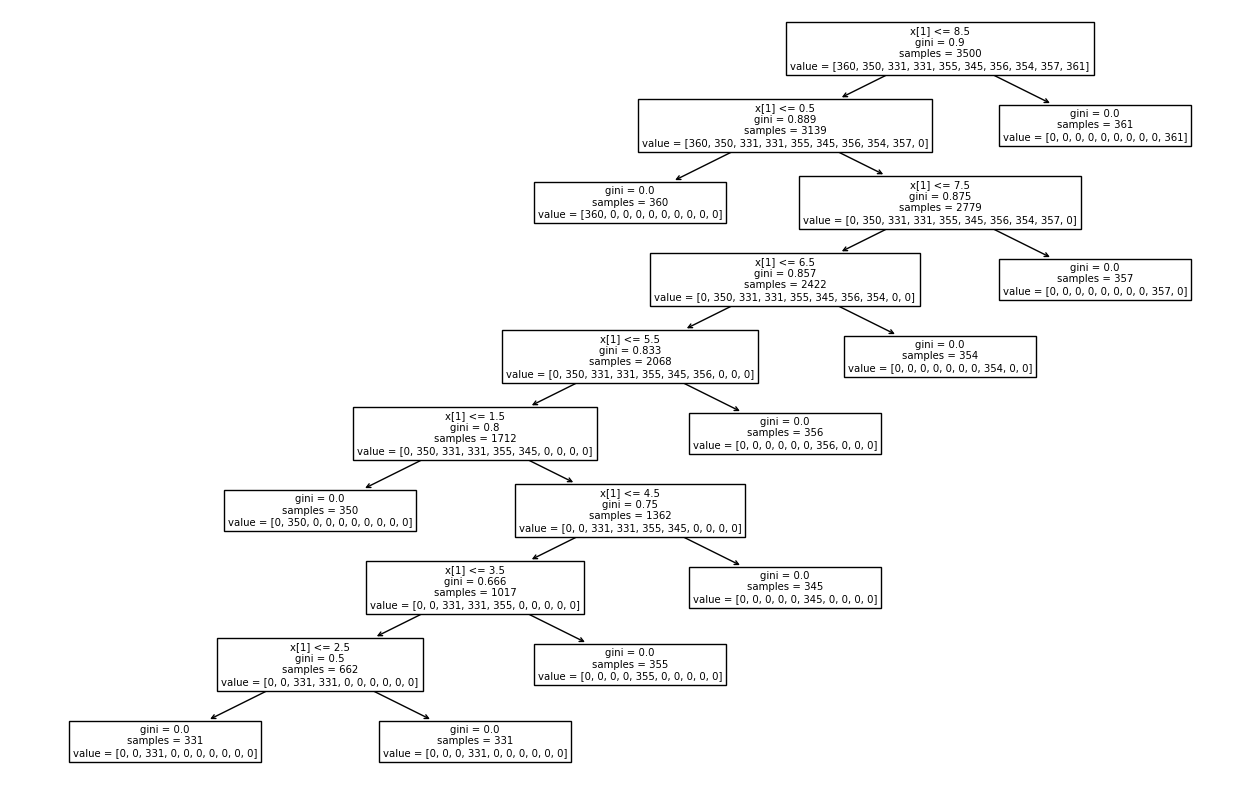

In [25]:
# Printing Decision Tree
plt.figure(figsize=(16, 10))

# Plot the tree with larger fonts
tree.plot_tree(decisionTree)

# Display the tree plot
plt.show()

In [19]:
# It Looks like our Decision Tree might be overfitting the data. Lets Deal with it using cross validation!

# Range of Hyperparameters
param_grid = {'ccp_alpha': [0.001, 0.002, 0.003, 0.004, 0.005]}

# Using GridSearchCV to perform cross validation
grid = GridSearchCV(estimator=decisionTree, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

# Getting the best alpha
best_alpha = grid.best_params_['ccp_alpha']

# Pruning the decision tree
pruned_tree = DecisionTreeClassifier(ccp_alpha=best_alpha)
pruned_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001)

In [20]:
# Checking Accuracy of Pruned Decision Tree
y_pred = pruned_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 1.0


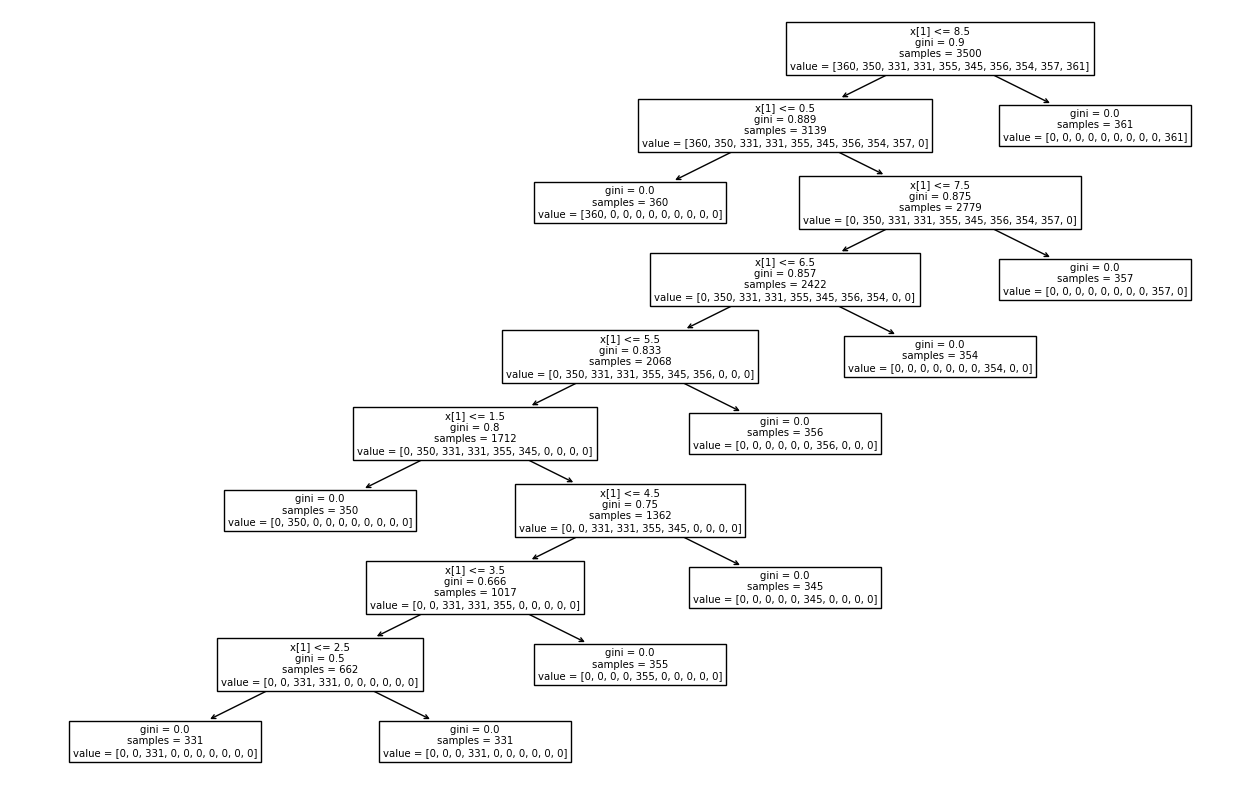

In [24]:
# Printing Decision Tree
plt.figure(figsize=(16, 10))

# Plot the tree with larger fonts
tree.plot_tree(pruned_tree)

# Display the tree plot
plt.show()